In [179]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [129]:
# https://www.prosper.com/welcome/fee_history.aspx
# prosper makes money from the closing fee upfront from borrower (BorrowerRate - LenderYield) * LoanAmount 
# and the servicing fee from the lender (LP_ServiceFees)
# late fee from the borrower is passed onto the lender 
# collection fee from the agency is passed onto the lender

In [130]:
df = pd.read_csv("prosperLoanData.csv") #Reading the dataset in a dataframe using Pandas

In [131]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [132]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [133]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #check for missing values. can conclude that 29084 out of 113937 loans were made before July 2009

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

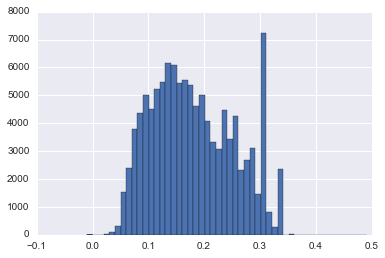

In [134]:
#df['LenderYield'].value_counts()
df['LenderYield'].hist(bins=50)

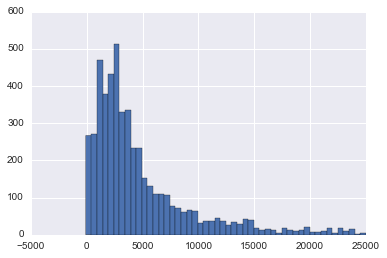

In [135]:
defaulted = df[df['LoanStatus']=='Defaulted']
#defaulted['LenderYield'].hist(bins=50)
defaulted['LP_GrossPrincipalLoss'].hist(bins=50)

In [136]:
df['LP_InterestandFees'].describe() #looks like there are negative fees

count    113937.000000
mean       1077.542901
std        1183.414168
min          -2.349900
25%         274.870000
50%         700.840100
75%        1458.540000
max       15617.030000
Name: LP_InterestandFees, dtype: float64

In [137]:
df[df['LP_InterestandFees'] < 0].transpose() # examine negative fee loans

,28384,91184
ListingKey,34CD3587284005601C13ED3,5FB33596391582382D26742
ListingNumber,880346,1049521
ListingCreationDate,2013-08-26 13:29:03.487000000,2013-12-11 18:13:10.023000000
CreditGrade,NaN,NaN
Term,36,36
LoanStatus,Chargedoff,Completed
ClosedDate,2014-01-28 00:00:00,2013-12-18 00:00:00
BorrowerAPR,0.32538,0.19859
BorrowerRate,0.2859,0.162
LenderYield,0.2759,0.152


In [138]:
df.loc[df['LP_InterestandFees'] <0, ['LP_InterestandFees']] = 0  #set 2 loans with negative fees to 0

In [139]:
df[df['LP_InterestandFees']==0]['LP_InterestandFees'].count() #6223 loans made zero fees + 2 we adjusted

6225

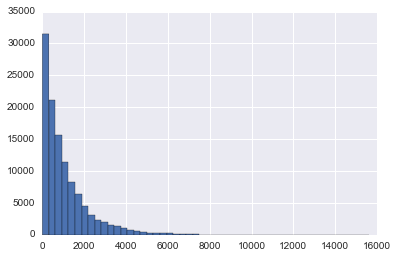

In [168]:
df['LP_InterestandFees'].hist(bins=50)  # heavy positive skew 

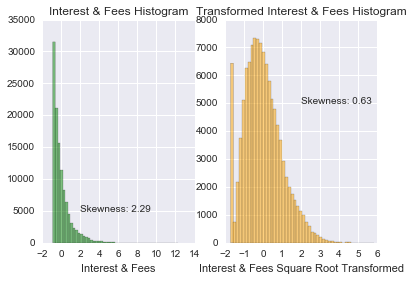

In [191]:
from sklearn import preprocessing
from scipy.stats import skew

#calculate the skewness
Fees = preprocessing.scale(df['LP_InterestandFees'])
FeesScaled = preprocessing.scale(np.sqrt(df['LP_InterestandFees']))
skew1 = skew(Fees)
skew2 = skew(FeesScaled)

#draw it
figure = plt.figure()
figure.add_subplot(121)
plt.hist(Fees, facecolor='green', alpha = .5, bins=50)
plt.xlabel("Interest & Fees") 
plt.title("Interest & Fees Histogram") 
plt.text(2,5000,"Skewness: {0:.2f}".format(skew1)) 

figure.add_subplot(122)
plt.hist(FeesScaled, facecolor='orange', alpha =.5, bins=50)
plt.xlabel("Interest & Fees Square Root Transformed") 
plt.title("Transformed Interest & Fees Histogram") 
plt.text(2,5000,"Skewness: {0:.2f}".format(skew2))
plt.show()

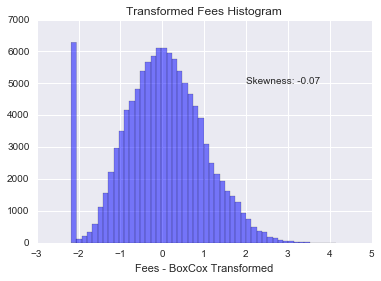

In [194]:
from scipy.stats import boxcox
FeesBoxCox= preprocessing.scale(boxcox(df['LP_InterestandFees']+1)[0])
skew3 = skew(FeesBoxCox)
   
plt.hist(FeesBoxCox,facecolor='blue',  alpha = .5, bins=50) 
plt.xlabel("Fees - BoxCox Transformed") 
plt.title("Transformed Fees Histogram") 
plt.text(2,5000,"Skewness: {0:.2f}".format(skew3)) 
plt.show()

#tried boxcox transformation and had the best results. 
#https://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

In [143]:
#df.boxplot(column='LP_InterestandFees')


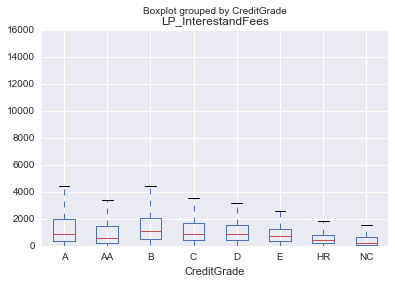

In [144]:
df.boxplot(column='LP_InterestandFees', by ='CreditGrade')
#credit grade available until July 2009. not all values are filled in 

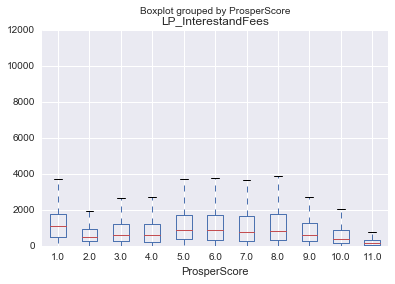

In [145]:
df.boxplot(column='LP_InterestandFees', by ='ProsperScore')
#prosper score only available from July 2009 onward. all values are filled

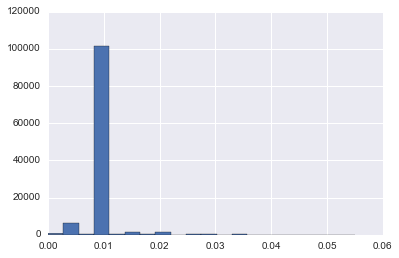

In [146]:
df['ClosingFeePercent'] = df['BorrowerRate'] - df['LenderYield']
df['ClosingFeePercent'].hist(bins=20)

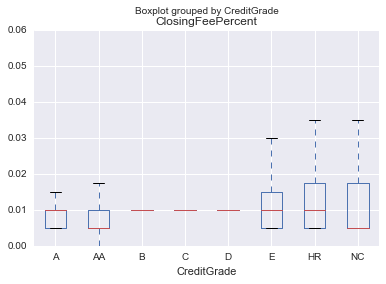

In [147]:
df['ClosingFeeDollar'] = df['ClosingFeePercent'] * df['LoanOriginalAmount']
df.boxplot(column='ClosingFeePercent', by ='CreditGrade')

In [148]:
df['LoanOriginationDate'] =  pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [149]:
df['Year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [150]:
df['TotalFeeDollar'] = df['ClosingFeeDollar'] - df['LP_ServiceFees']
#revenue = df[['TotalFeeDollar']]
keep = ['TotalFeeDollar', 'LoanOriginationDate', 'Year', 'CreditGrade', 'ProsperScore',\
        'ListingCategory (numeric)','BorrowerState','LoanStatus']
revenue = df[keep]

In [151]:
revenue.head()

,TotalFeeDollar,LoanOriginationDate,Year,CreditGrade,ProsperScore,ListingCategory (numeric),BorrowerState,LoanStatus
0,321.680,2007-09-12,2007,C,NaN,0,CO,Completed
1,100.000,2014-03-03,2014,NaN,7.0,2,CO,Current
2,129.235,2007-01-17,2007,HR,NaN,0,GA,Completed
3,208.010,2012-11-01,2012,NaN,9.0,16,GA,Current
4,210.270,2013-09-20,2013,NaN,4.0,2,MN,Current


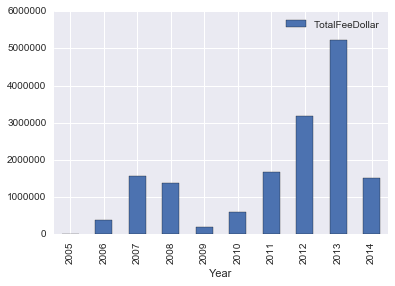

In [152]:
revenue[['TotalFeeDollar', 'Year']].groupby('Year').sum().plot(kind='bar')

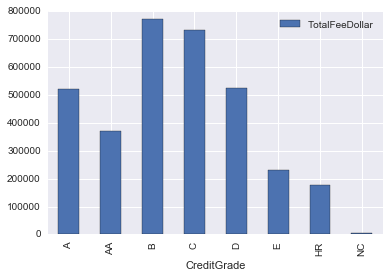

In [153]:
revenue[['TotalFeeDollar', 'CreditGrade']].groupby('CreditGrade').sum().plot(kind='bar')

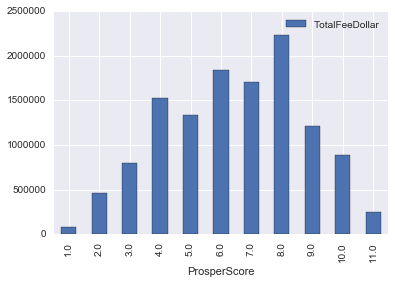

In [154]:
revenue[['TotalFeeDollar', 'ProsperScore']].groupby('ProsperScore').sum().plot(kind='bar')

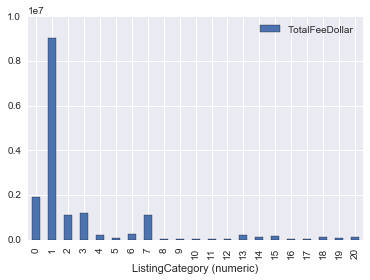

In [155]:
revenue[['TotalFeeDollar', 'ListingCategory (numeric)']].groupby('ListingCategory (numeric)').sum().plot(kind='bar')

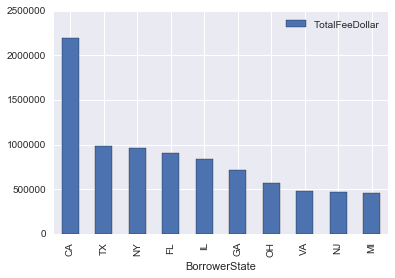

In [156]:
state = revenue[['TotalFeeDollar', 'BorrowerState']].groupby('BorrowerState').sum()
state = state.sort_values(by='TotalFeeDollar', ascending=False) #sorted by revenues
state.head(10).plot(kind='bar') #plot top 10

In [157]:
state2 = revenue.pivot_table(index=['BorrowerState'],values=["TotalFeeDollar"],aggfunc=[np.sum,len], fill_value=0,margins=True)
stackedstate = state2.stack(1).sort_values(by='sum',ascending=False)
stackedstate['FeePerLoan'] = stackedstate['sum']/stackedstate['len']

In [158]:
stackedstate.sort_values(by='FeePerLoan',ascending=False).head(10)
#seems that loans from DC makes the most in fees

,,sum,len,FeePerLoan
BorrowerState,,,,
DC,TotalFeeDollar,6.677307e+04,382.0,174.798613
MD,TotalFeeDollar,4.341127e+05,2821.0,153.886094
NH,TotalFeeDollar,8.466804e+04,551.0,153.662511
MA,TotalFeeDollar,3.440270e+05,2242.0,153.446458
NJ,TotalFeeDollar,4.721151e+05,3097.0,152.442715
CA,TotalFeeDollar,2.189506e+06,14717.0,148.773935
CT,TotalFeeDollar,2.401093e+05,1627.0,147.577935
VA,TotalFeeDollar,4.808101e+05,3278.0,146.677871
AK,TotalFeeDollar,2.887463e+04,200.0,144.373150


In [159]:
report = df.pivot_table(values=['ProsperScore'],index=['BorrowerState'], fill_value=0, aggfunc=np.mean)
report.sort_values(by='ProsperScore',ascending=False).head(10) 
#top average prosper score, hypothesize was right DC loans were most credit worthy

,ProsperScore
BorrowerState,
DC,6.786585
IL,6.236867
DE,6.205993
MA,6.180776
GA,6.126382
CA,6.100920
WA,6.073850
WI,6.069034
VA,6.036344


In [160]:
df.pivot_table(values=['LP_GrossPrincipalLoss'],index=['Year'],columns=['ProsperScore'], fill_value=0, aggfunc=np.sum)
 #gross principal losses by vintage(origination date) and prosper credit score.

LP_GrossPrincipalLoss                                            \
ProsperScore                  1.0         2.0         3.0      4.0      5.0    
Year                                                                           
2009                      27879.54     2801.83    11581.32    91549   109294   
2010                      81004.43    61217.99    57413.27   147348   368864   
2011                     497830.93   499044.04   499014.50  1606301  1846459   
2012                     402861.03  1007652.65  1120123.39  1535412  2428590   
2013                       3638.36   414156.56   502092.80   464155   393766   
2014                          0.00        0.00        0.00        0        0   

                                                                 
ProsperScore     6.0      7.0      8.0     9.0        10.0 11.0  
Year                                                             
2009            94648   147233   191421  148390   23667.69    0  
2010           482449   444337   514238  348735   94885.25    0  
2011          1865715  1088931  1568172  537051  118252.22    0  
2012          3052017  2706721  2664818  820880  154914.19    0  
2013           267927   161089   105323   88527   41869.42    0  
2014                0        0        0       0       0.00    0

In [161]:
import seaborn as sns

In [162]:
df['LP_InterestandFees_log'].dropna().describe()



count    1.139370e+05
mean             -inf
std               NaN
min              -inf
25%      5.616298e+00
50%      6.552280e+00
75%      7.285191e+00
max      9.656117e+00
Name: LP_InterestandFees_log, dtype: float64

OverflowError: cannot convert float infinity to integer

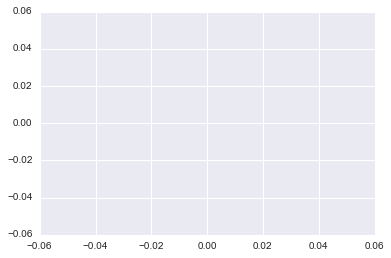

In [163]:
sns.distplot(df['LP_InterestandFees_log'].dropna())

In [ ]:
df['LP_InterestandFees'].describe()
